In [55]:
# Importation des bibliothèques nécessaires

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import scipy.stats as stats
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler

In [56]:
# Chargement des données du vin rouge à partir d'un fichier csv
df_1=pd.read_csv("Projet ACP\winequality-red.csv", sep=';')
# Affichage des 5 premières lignes du DataFrame
df_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
# types des données du vin rouge
df_1.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [58]:
# Recherche des valeurs manquantes dans les données du vin rouge
df_1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [59]:
# Information sur les données du vin rouge
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [60]:
# Création de la variable type de vin
df_1['type_wine']="red"
df_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [61]:
# Chargement des données du vin blanc à partir d'un fichier csv
df_2=pd.read_csv("Projet ACP\winequality-white.csv", sep=';')
# Affichage des 5 premières lignes du DataFrame
df_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [62]:
# Types des données du vin blanc
df_2.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [63]:
# Recherche des valeurs manquantes dans les données du vin blanc
df_2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [64]:
# Information sur les données du vin blanc 
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [65]:
df_2["type_wine"]="white"
df_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [66]:
# Concaténation des deux bases de données df_1 et df_2
df=pd.concat([df_1,df_2], ignore_index=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## Analyse descriptive univariées

In [67]:
# Analyse descriptive du jeu de données
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


IndexError: index 12 is out of bounds for axis 0 with size 12

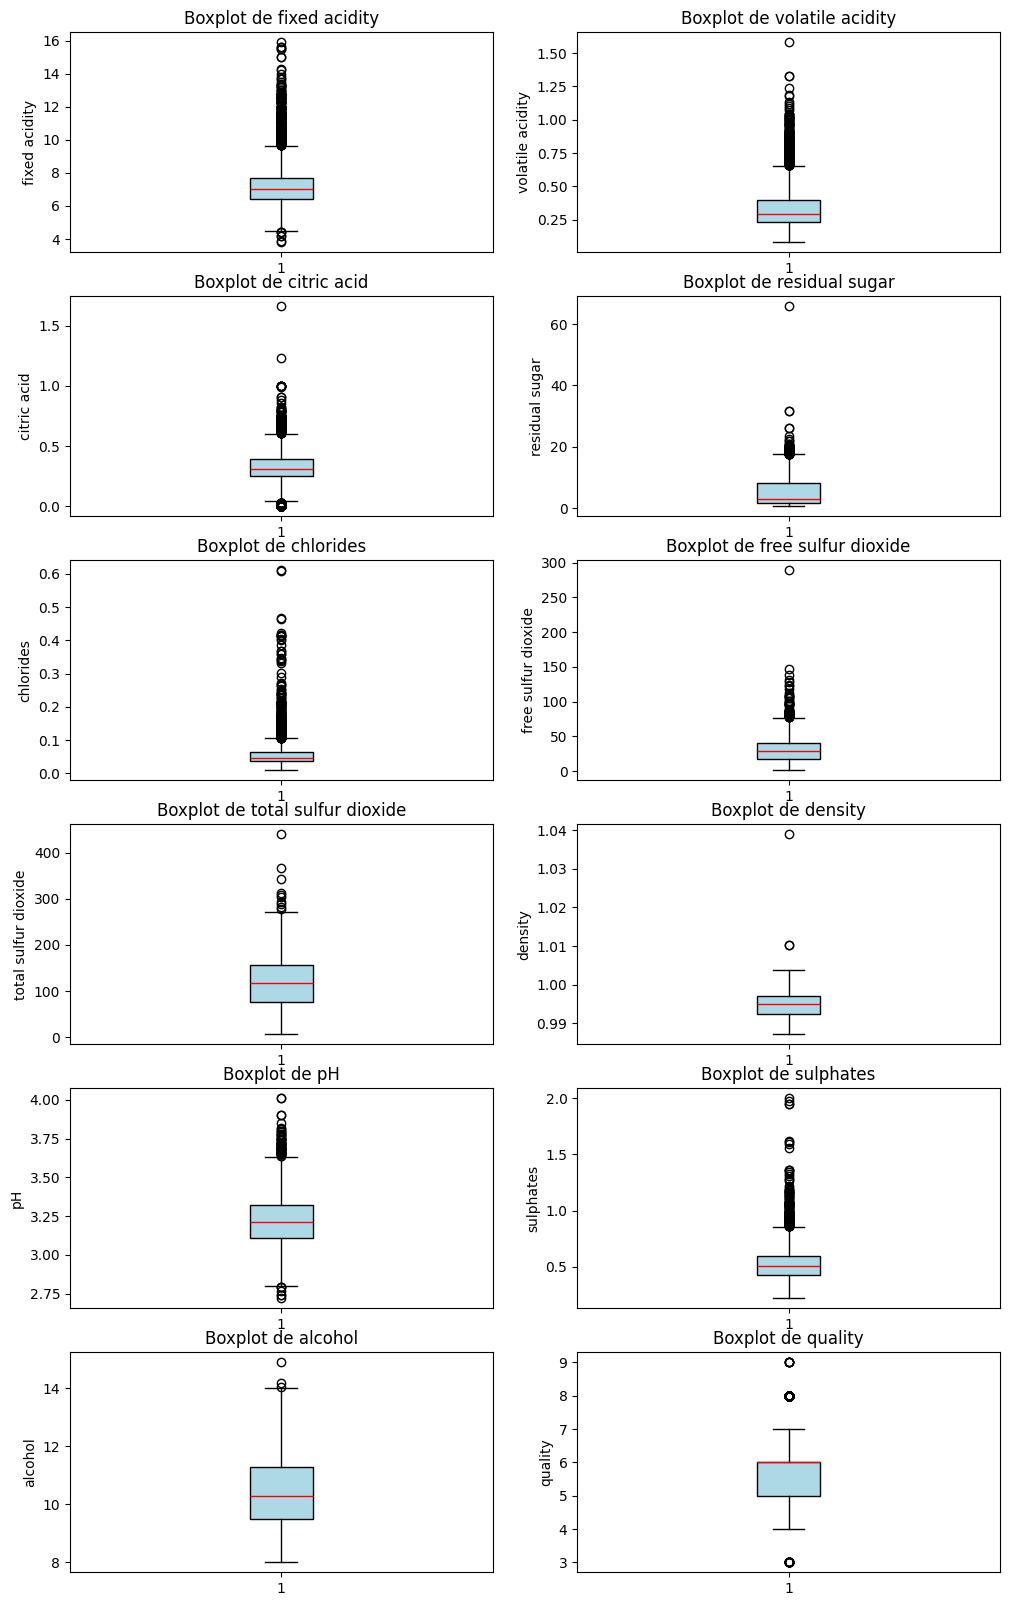

In [70]:
# Analyse descriptive des variables quantitatives
fig, axes = plt.subplots(6,2, figsize=(12,20))

# Aplatir les axes pour itérer facilement
axes = axes.flatten()

# Créer les boxplots dans chaque sous-graphe 
for i, var in enumerate(df):
    axes[i].boxplot(df[var].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black'),
                    medianprops=dict(color='red'))
    axes[i].set_title(f'Boxplot de {var}')
    axes[i].set_ylabel(var)

# Retirer les axes vides s’il y en a
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster l’espacement entre les subplots
plt.tight_layout()
plt.show()

IndexError: index 12 is out of bounds for axis 0 with size 12

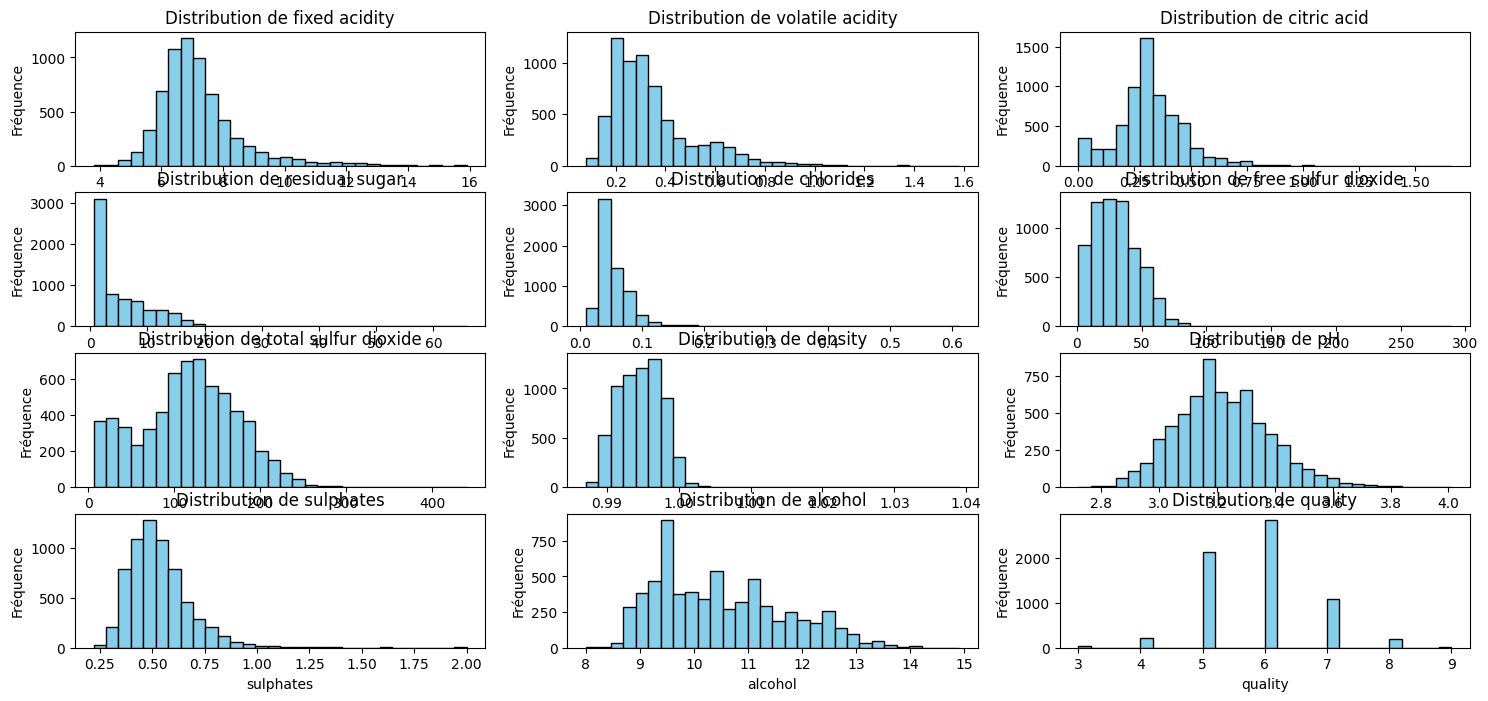

In [71]:
# Analyse de la noramlité des variables quantitatives
fig, axes = plt.subplots(4, 3, figsize=(18, 8))
# Aplatir les axes pour itérer facilement
axes = axes.flatten()
# Créer les histogrammes dans chaque sous-graphe
for i, var in enumerate(df):
    axes[i].hist(df[var], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Fréquence')

# Ajuster l’espacement entre les subplots
plt.tight_layout()
plt.show()

In [ ]:
# Résultats du test de Shapiro-Wilk
shapiro_results = {}

for column in df.columns:
    stat, p_value = stats.shapiro(df[column])
    shapiro_results[column] = {'statistic': stat, 'p_value': p_value}

# Affichage sous forme de DataFrame
shapiro_df = pd.DataFrame(shapiro_results).T
shapiro_df = shapiro_df.sort_values(by='p_value')

# Interprétation : p < 0.05 → rejet de H0 = non-normalité
shapiro_df['normalité (p>0.05)'] = shapiro_df['p_value'] > 0.05

shapiro_df

c:\Users\HP 840 G3\OneDrive\Documents\Portfolio\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6497.
  res = hypotest_fun_out(*samples, **kwds)


,statistic,p_value,normalité (p>0.05)
chlorides,0.618317,1.453455e-80,False
residual sugar,0.824672,1.757308e-64,False
volatile acidity,0.875867,6.255995e-58,False
fixed acidity,0.879789,2.437973e-57,False
quality,0.884107,1.138821e-56,False
sulphates,0.898956,3.382989e-54,False
free sulfur dioxide,0.941289,5.790497e-45,False
alcohol,0.953532,2.918847e-41,False
citric acid,0.964977,5.262332e-37,False
density,0.968205,1.322803e-35,False


## Analyse bivariées

c:\Users\HP 840 G3\OneDrive\Documents\Portfolio\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\HP 840 G3\OneDrive\Documents\Portfolio\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\HP 840 G3\OneDrive\Documents\Portfolio\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\HP 840 G3\OneDrive\Documents\Portfolio\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\HP 840 G3\OneDrive\Documents\Portfolio\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

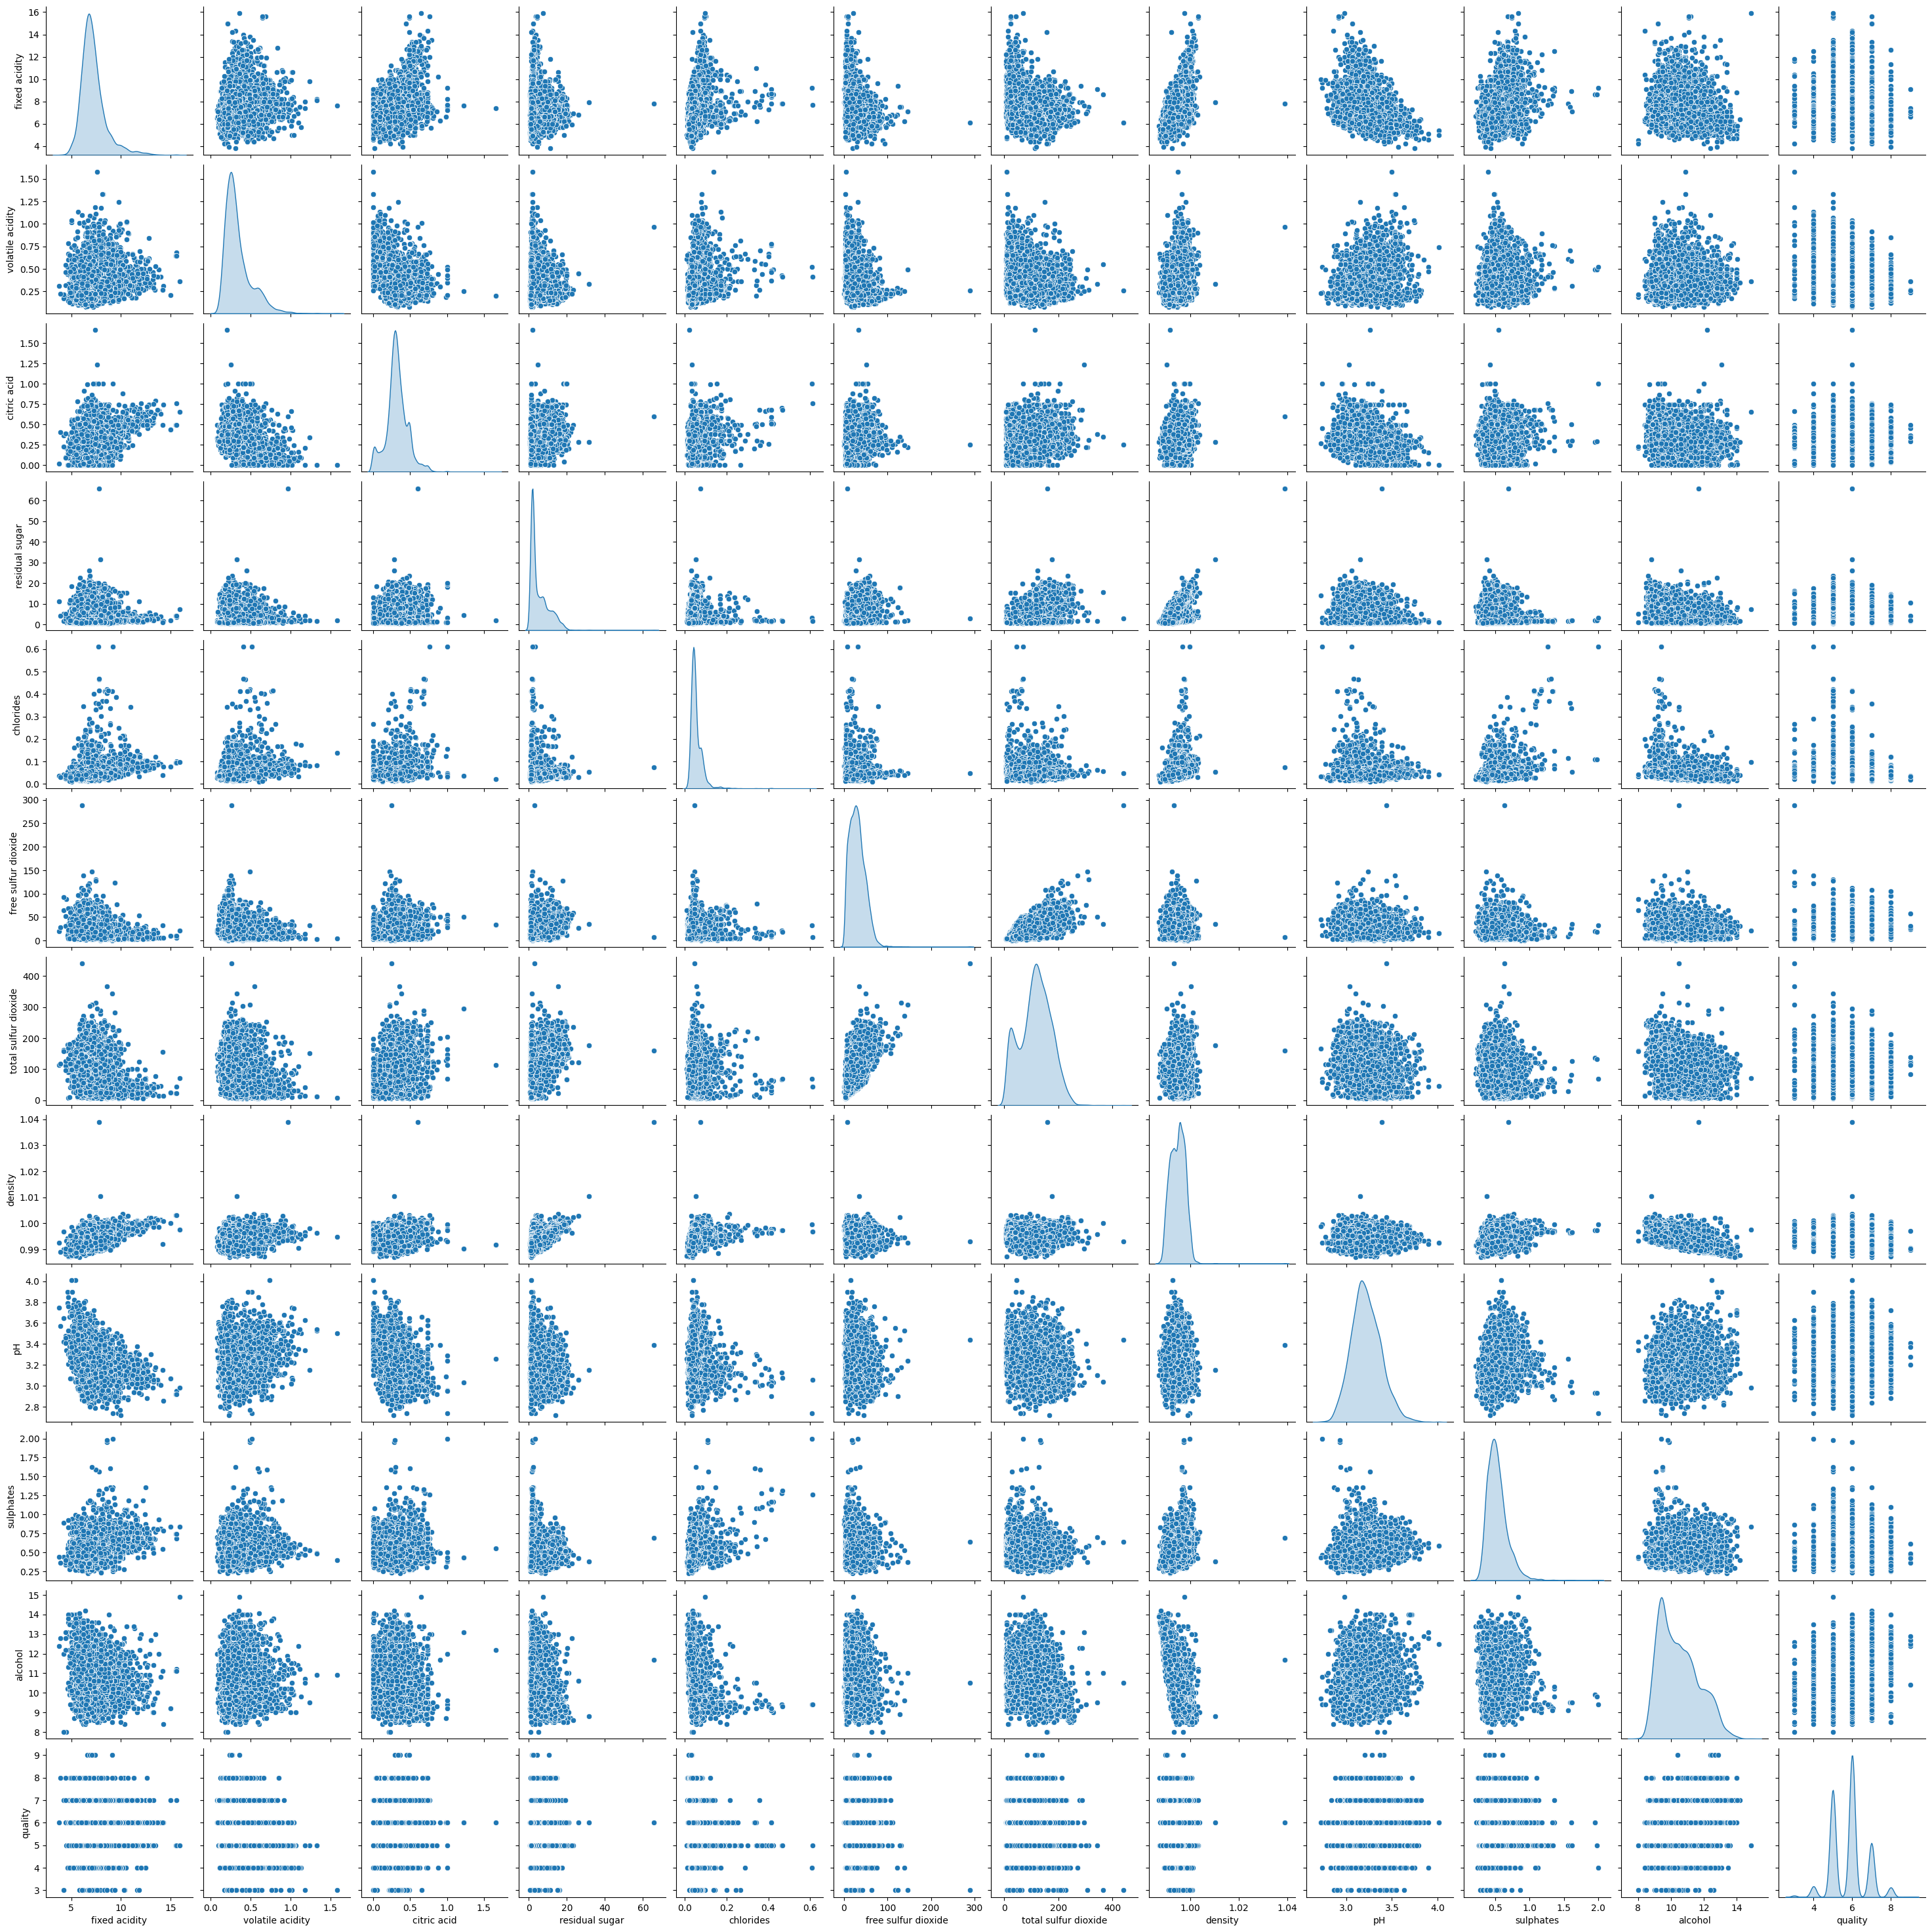

In [ ]:
## Relation entre les variables quantitatives
sns.pairplot(df, diag_kind='kde', markers='o', palette='vridian')

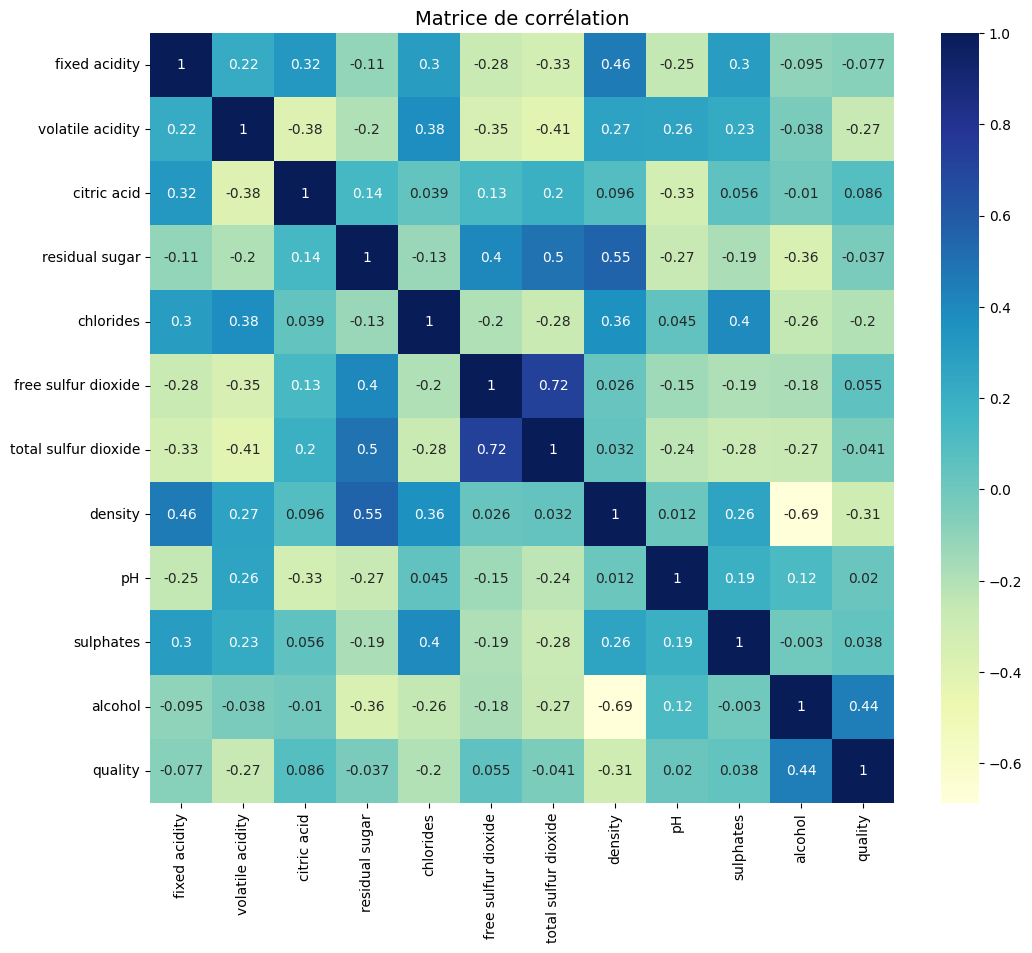

In [ ]:
# Calcul de la matrice de corrélation
correlation_matrice=df.corr()

# Affichage de Heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrice, annot=True, cmap="YlGnBu")
plt.title("Matrice de corrélation", fontsize=14)
plt.show()

## Analyse multivariée l'ACP

### Construction de L'ACP

In [ ]:
# Importation des packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
